In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [2]:
with open('./NN_result/lt_df_NN_rank_9days.pkl', 'rb') as file:
    lt_df_NN_rank = pickle.load(file)

In [3]:
full_table = pd.concat(lt_df_NN_rank[-8:], ignore_index=True)

In [4]:
full_table

,target,next,rank,NN_rank
0,2063176,1793668,53.00,40
1,1036421,215370,26.00,50
2,1036421,215370,26.00,50
3,4364467,632080,19.00,2
4,632080,4272037,20.00,61
...,...,...,...,...
1953675,4168531,1228366,14.00,20
1953676,1228366,4168531,58.00,13
1953677,1044710,802644,4.00,32
1953678,802644,4063028,19.00,34


In [5]:
full_table.describe()

,rank,NN_rank
count,1953680.00,1953680.00
mean,30.65,32.30
std,28.13,27.73
min,1.00,1.00
25%,6.00,8.00
50%,21.00,24.00
75%,50.00,52.00
max,99.00,99.00


---

In [6]:
table_grby = full_table.groupby(['target', 'next'])
pd.DataFrame(table_grby.size())

0
target  next       
100000  832989    1
1000042 3290297   1
        3742105   1
        3975190   1
        4714261   1
...              ..
999828  5114143   5
        730054    4
        766525   44
999949  1062644   1
999951  17116     1

[470518 rows x 1 columns]

In [7]:
df_table  = pd.merge(pd.DataFrame(table_grby.size()), full_table, on=['target', 'next'], how='left')

In [8]:
df_table.rename(columns = {0:'occur'}, inplace=True)

In [9]:
df_table

,target,next,occur,rank,NN_rank
0,100000,832989,1,51.00,3
1,1000042,3290297,1,1.00,40
2,1000042,3742105,1,36.00,73
3,1000042,3975190,1,95.00,79
4,1000042,4714261,1,20.00,99
...,...,...,...,...,...
1953675,999828,766525,44,7.00,17
1953676,999828,766525,44,7.00,17
1953677,999828,766525,44,7.00,17
1953678,999949,1062644,1,4.00,7


In [10]:
df_table.describe()

,occur,rank,NN_rank
count,1953680.00,1953680.00,1953680.00
mean,40.54,30.65,32.30
std,77.12,28.13,27.73
min,1.00,1.00,1.00
25%,3.00,6.00,8.00
50%,13.00,21.00,24.00
75%,42.00,50.00,52.00
max,832.00,99.00,99.00


In [11]:
df_table.groupby('occur').mean().describe()

,rank,NN_rank
count,351.00,351.00
mean,16.23,13.87
std,12.73,10.48
min,1.00,1.00
25%,5.00,4.58
50%,15.00,12.30
75%,23.85,21.18
max,89.00,46.65


In [12]:
df_table.groupby('occur').mean().to_csv('result_-8days.csv')

TypeError: 'AxesSubplot' object is not subscriptable

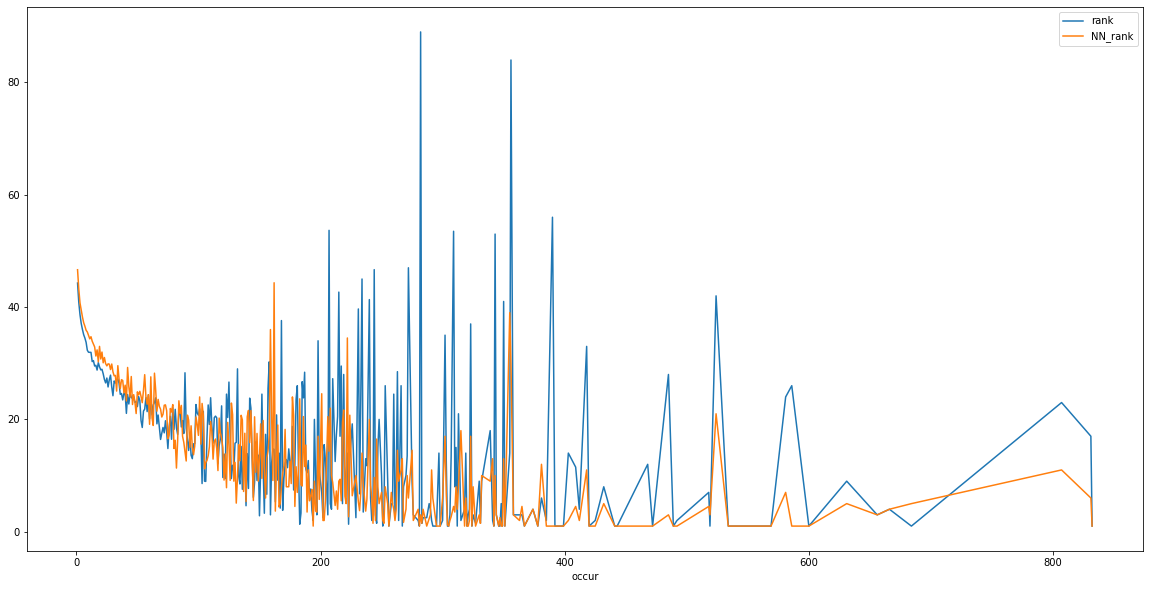

In [12]:
df_table.groupby('occur').mean().plot(figsize=(20,10))[:100]